In [2]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import requests
import json 
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

import plotly.express as pex
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import FeatureAgglomeration

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

from statsmodels.stats.weightstats import ztest as ztest

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import plotly.graph_objects as go
import plotly.offline as pyo
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings("ignore")

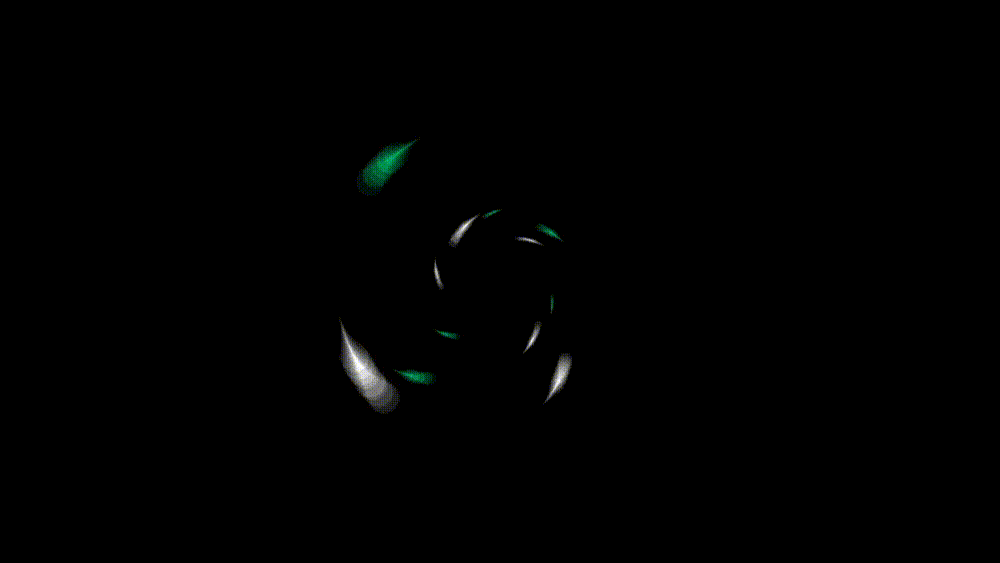

### Connection to API

In [3]:
CLIENT_ID = "e83d3836d10b4d06a00845db78de3dfb"
CLIENT_SECRET = "6aab53d5a2074b6d9552fb767cdf142c"

auth_manager = SpotifyClientCredentials(
    client_id=CLIENT_ID, client_secret=CLIENT_SECRET
)
spotify = spotipy.Spotify(client_credentials_manager=auth_manager)

### Function to bring in playlists

x is the url of your playlist. 

In [5]:
def playlisttodf(x):
    playlist=pd.DataFrame(spotify.playlist_items(x))
    flatten_1=pd.json_normalize(playlist['items'])
    songlist=[]
    for i in flatten_1['track.external_urls.spotify']:
        songlist.append(spotify.audio_features(i))
    df=pd.DataFrame(songlist)
    flatten_2=pd.json_normalize(df[0])
    final_playlist=pd.concat(((flatten_1['track.name']),flatten_2),axis=1)
    final_playlist['track_number_inlist']=final_playlist.index+1
    final_playlist['minutestamp']=(final_playlist['duration_ms'].cumsum())/60000
    y=spotify.playlist(x)['name']
    final_playlist['original_playlist']= y
    return final_playlist


In [6]:
marathon= playlisttodf('https://open.spotify.com/playlist/2CPap0lQiK320ROUnBzxKk')

### Function to visualize playlist's features

In [60]:
def visualizer(x):
    sfeat=['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
    scaler = StandardScaler()
    scaler.fit(x[sfeat])
    vis = pd.DataFrame(
    scaler.transform(x[sfeat]), columns=scaler.feature_names_in_)
    vis['minutestamp']=x['minutestamp']
    return sns.pairplot(vis,y_vars=['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],x_vars=['minutestamp'])

### My perfectly crafted marathon playlist. 


In [9]:
PCP='https://open.spotify.com/playlist/2CPap0lQiK320ROUnBzxKk'

In [12]:
marathon=playlisttodf(PCP)

# CREATE PCA

### Function to create PCs based on original playlist

x is the df if your original playlist

In [7]:
def createpca(x):
    sfeat=['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
    scaler = StandardScaler()
    scaler.fit(x[sfeat])
    x_sca = pd.DataFrame(
    scaler.transform(x[sfeat]), columns=scaler.feature_names_in_)
    x_pca = PCA(n_components= 2)
    x_pca.fit(x_sca)
    x_transformed= pd.DataFrame(x_pca.transform(x_sca),columns=["PC" + str(i) for i in range(x_pca.n_components_)])
    playlist_with_pca=pd.concat((x,x_transformed),axis=1)
    return playlist_with_pca

In [8]:
marathon_pca=createpca(marathon)

### Bring in your liked songs

In [36]:
CLIENT_ID = "e83d3836d10b4d06a00845db78de3dfb"
CLIENT_SECRET = "6aab53d5a2074b6d9552fb767cdf142c"

auth_manager = SpotifyClientCredentials(
    client_id=CLIENT_ID, client_secret=CLIENT_SECRET
)
spotify = spotipy.Spotify(client_credentials_manager=auth_manager)

In [10]:
liked_songs=['https://open.spotify.com/playlist/0ygkDmQU8WKFHsR7LwiztI',
             'https://open.spotify.com/playlist/4GxGb7D4ct1JT8iQu9fBY8',
             'https://open.spotify.com/playlist/1vfXcHY6EmmJYhEOQcZfKJ',
             'https://open.spotify.com/playlist/6tetitu7NqbFwNqADgUUQy',
             'https://open.spotify.com/playlist/5sPnLfRFNK9SIDiq6HAjZ9',
             'https://open.spotify.com/playlist/7seGteU0tGuKqVtxT5brg5']

In [17]:
liked=pd.DataFrame()
for i in liked_songs:
    y=playlisttodf(i)
    liked=pd.concat((liked,y))
    

In [27]:
liked.reset_index().drop(columns='index',inplace=True)

In [28]:
liked

,index,track.name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_number_inlist,minutestamp,original_playlist
0,0,Put Your Head on My Shoulder,0.549,0.433,7,-8.526,1,0.0327,0.9060,0.010800,...,audio_features,7eqNATKM78MkWP6aHGXHEV,spotify:track:7eqNATKM78MkWP6aHGXHEV,https://api.spotify.com/v1/tracks/7eqNATKM78Mk...,https://api.spotify.com/v1/audio-analysis/7eqN...,155080,3,1,2.584667,liked1
1,1,Padam padam,0.385,0.283,5,-8.013,0,0.0546,0.7800,0.000000,...,audio_features,194uD6fRM58ztn7Z1Mfyr2,spotify:track:194uD6fRM58ztn7Z1Mfyr2,https://api.spotify.com/v1/tracks/194uD6fRM58z...,https://api.spotify.com/v1/audio-analysis/194u...,197627,3,2,5.878450,liked1
2,2,J'm'en fous pas mal,0.427,0.374,5,-9.925,0,0.0759,0.9800,0.000000,...,audio_features,5lGe7LrFSl53vbL1N2p5nt,spotify:track:5lGe7LrFSl53vbL1N2p5nt,https://api.spotify.com/v1/tracks/5lGe7LrFSl53...,https://api.spotify.com/v1/audio-analysis/5lGe...,260120,3,3,10.213783,liked1
3,3,Heureuse,0.289,0.218,0,-8.587,1,0.0387,0.9640,0.000132,...,audio_features,5NvtYYIYViQ2uV0fzoBTIi,spotify:track:5NvtYYIYViQ2uV0fzoBTIi,https://api.spotify.com/v1/tracks/5NvtYYIYViQ2...,https://api.spotify.com/v1/audio-analysis/5Nvt...,197973,3,4,13.513333,liked1
4,4,Exodus,0.258,0.357,8,-8.713,0,0.0294,0.7890,0.000007,...,audio_features,7pgAZyxlGqmFlGp7zeY9iz,spotify:track:7pgAZyxlGqmFlGp7zeY9iz,https://api.spotify.com/v1/tracks/7pgAZyxlGqmF...,https://api.spotify.com/v1/audio-analysis/7pgA...,210333,4,5,17.018883,liked1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,13,Mystery of Love,0.365,0.273,4,-16.526,0,0.0380,0.9400,0.431000,...,audio_features,0MNNKSUU9OOQ8DSGWduw79,spotify:track:0MNNKSUU9OOQ8DSGWduw79,https://api.spotify.com/v1/tracks/0MNNKSUU9OOQ...,https://api.spotify.com/v1/audio-analysis/0MNN...,248965,5,14,53.808967,liked6
513,14,Apocalypse,0.370,0.467,5,-9.013,1,0.0273,0.0205,0.572000,...,audio_features,0yc6Gst2xkRu0eMLeRMGCX,spotify:track:0yc6Gst2xkRu0eMLeRMGCX,https://api.spotify.com/v1/tracks/0yc6Gst2xkRu...,https://api.spotify.com/v1/audio-analysis/0yc6...,290617,4,15,58.652583,liked6
514,15,"Vivaldi: The Four Seasons, Violin Concerto in ...",0.362,0.569,7,-15.394,0,0.0345,0.8760,0.910000,...,audio_features,2nnXe7n3Vivs7OfQKRsfWD,spotify:track:2nnXe7n3Vivs7OfQKRsfWD,https://api.spotify.com/v1/tracks/2nnXe7n3Vivs...,https://api.spotify.com/v1/audio-analysis/2nnX...,173427,3,16,61.543033,liked6
515,16,Experience,0.447,0.449,2,-10.634,1,0.0376,0.9340,0.961000,...,audio_features,1BncfTJAWxrsxyT9culBrj,spotify:track:1BncfTJAWxrsxyT9culBrj,https://api.spotify.com/v1/tracks/1BncfTJAWxrs...,https://api.spotify.com/v1/audio-analysis/1Bnc...,315427,4,17,66.800150,liked6


### Function to apply PCA to pool 

Apply PCA to replacement pool. x is the df of your original playlist. y is the dataframe of your pool. 

In [29]:
def pcatopool(x,y):
    sfeat=['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
    scaler = StandardScaler()
    scaler.fit(x[sfeat])
    x_sca = pd.DataFrame(
    scaler.transform(x[sfeat]), columns=scaler.feature_names_in_)
    x_pca = PCA(n_components= 2)
    x_pca.fit(x_sca)
    
    scaler2 = StandardScaler()
    scaler2.fit(y[sfeat])
    y_sca = pd.DataFrame(
    scaler2.transform(y[sfeat]), columns=scaler2.feature_names_in_)
    
    y_transformed= pd.DataFrame(x_pca.transform(y_sca),columns=["PC" + str(i) for i in range(x_pca.n_components_)])
    playlist_with_pca=pd.concat((y,y_transformed),axis=1)
    return playlist_with_pca

In [30]:
pool_pca=pcatopool(marathon,liked)

# Recommender System

Based on the two PCAs make a list of the 10 best replacements per song.

### Function to create a simi Matrix

x is the pca'ed pool list which includes your songs btw. 

In [33]:
def simi_matrix (x):
    for_cosine= x[['PC0','PC1']]
    cosine_similarities = cosine_similarity(for_cosine)
    x_cosine=pd.DataFrame(cosine_similarities)
    similarities = {}
    for i in range(len(cosine_similarities)): 
        similar_indices = cosine_similarities[i].argsort()[:-10:-1] 
        similarities[x['track.name'].iloc[i]] = [(cosine_similarities[i][a],x['track.name'][a],x['uri'][a]) for a in similar_indices][1:]
    similarities_df=pd.DataFrame(similarities)
    return similarities_df

In [34]:
s_matrix=simi_matrix(pool_pca)

### Function to Recommend based on simi matrix

x is the simi_matrix and y is the result of create pca, n is the number of playlist you want. 

In [38]:
def recommender(x,y,n):
    songs_from_y=list(y['track.name'])
    recommender_chart=x[songs_from_y]
    rec_chart_T=recommender_chart.transpose()
    created_playlists=pd.DataFrame()
    for i in range(n):
        indices = np.random.choice(np.arange(len(rec_chart_T.columns)), len(rec_chart_T), replace=True)
        created_playlists[f'random{i}'] = rec_chart_T.to_numpy()[np.arange(len(rec_chart_T)), indices]
    return created_playlists

In [97]:
random=recommender(s_matrix,marathon_pca,1)

In [102]:
random

,random0
0,"(0.9997239558234284, Simon and Lady Danbury, s..."
1,"(0.999940776211365, Dancing On My Own, spotify..."
2,"(0.9999681143003892, 64º02'44.1""N 16º10'48.5""W..."
3,"(0.9993172545181679, Hoppípolla, spotify:track..."
4,"(0.9999991645842266, Saturn, spotify:track:3tJ..."
...,...
78,"(0.9999747020308254, Wind Of Change, spotify:t..."
79,"(0.9998758238556199, Starálfur, spotify:track:..."
80,"(0.999967401477483, Amarte es un placer, spoti..."
81,"(0.9996170738685818, Golden Brown, spotify:tra..."


TO print it takes the answer from random. 

In [100]:
def printer(x):
    R=[]
    for i in range(len(x)):
        R.append(x['random0'].iloc[i][1])
    outcome=pd.DataFrame(R,columns=['Fresh Beats'])
    return outcome

In [101]:
printer(random)

,Fresh Beats
0,Simon and Lady Danbury
1,Dancing On My Own
2,"64º02'44.1""N 16º10'48.5""W"
3,Hoppípolla
4,Saturn
...,...
78,Wind Of Change
79,Starálfur
80,Amarte es un placer
81,Golden Brown


# POSTING TO SPOTIFY 

### Function to create the uris

creating uris lists. x is the result of recommender, n is the list you want to post. 

In [103]:
def uriscreator(x,n):
    uris=[]
    for i in range(len(x)):
        uris.append(x[f'random{n}'].iloc[i][2])
    return uris
    

In [104]:
uris=uriscreator(random,0)

In [105]:
uris

['spotify:track:2hIuEnjD66R7bwZbOOvEBV',
 'spotify:track:5zn0ihstICpxoC6rXS2P6t',
 'spotify:track:726DOdDkIlmEyqLqLMo6an',
 'spotify:track:6eTGxxQxiTFE6LfZHC33Wm',
 'spotify:track:3tJjZMHLqhD8DaGgdBICnc',
 'spotify:track:0MNNKSUU9OOQ8DSGWduw79',
 'spotify:track:3mDRj6QwmDUgjKVIGMU0nk',
 'spotify:track:2tUBqZG2AbRi7Q0BIrVrEj',
 'spotify:track:5CPrUBHBeR3RnDNtFe5kLP',
 'spotify:track:5dejgEWM3pqn3kzqylgNtf',
 'spotify:track:3F5noAzNQwxdJbUyKg3koP',
 'spotify:track:0lPXFrKyl8HkdQ2E6NmNja',
 'spotify:track:0BzEGeIRIyUxFJYRYJTeCh',
 'spotify:track:5EY6yQXMCtX5EbkC0ru0LV',
 'spotify:track:2JkuzAuHJpm4jDQVaPD3cr',
 'spotify:track:0pQskrTITgmCMyr85tb9qq',
 'spotify:track:4AHU8QRdwCUWxPC53cw4Hh',
 'spotify:track:5BE9B2FiFWBbBdoIQ1m1UP',
 'spotify:track:07ABETRdek3ACMpRPvQuaT',
 'spotify:track:4MhTFsyqIJnjsOweVcU8ug',
 'spotify:track:3L7RtEcu1Hw3OXrpnthngx',
 'spotify:track:2VxeLyX666F8uXCJ0dZF8B',
 'spotify:track:3EK4tGkSiO5xvvB5sM4tln',
 'spotify:track:4QMvxtZGcmvwWtmmoiRs5B',
 'spotify:track:

### Function to post to my profile. 

Actually posting. x is your user_id, y is your token and  z is the answer from uriscreator

In [108]:
def spotiposter(x,y,z):
    
    endpoint_url = f"https://api.spotify.com/v1/users/{x}/playlists"
    request_body = json.dumps({
              "name": "Marmpy Playlist",
              "description": "Marathon Music thru Python",
              "public": False})
    response = requests.post(url = endpoint_url, data = request_body, headers={"Content-Type":"application/json", 
                            "Authorization":(f"Bearer {y}")})
        
    
    playlist_id = response.json()['id']
    endpoint_url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"

    request_body = json.dumps({"uris" : z})
    
    response2 = requests.post(url = endpoint_url, data = request_body, headers={"Content-Type":"application/json", 
                        "Authorization":(f"Bearer {y}")})
    return response2



In [109]:
spotiposter('31uvud4g34sxnubziu2mwdrsuzxa','BQBILWtpvd95eOXqxbC0tDK7_ZS3R-P7v4Z3JjT6NQM-zgKETP5v2bHf9vn1m8cP6FeZcTVg5eBMkeJ9Mu7QaTuaXL7H4f1EBTguXjwiD--VEioPfSZPMqfMxoTjb8wZhcRIqTvGAsHYOQyDlIYxC5Y9lJJrh9qJcrQDF9Au_8IRGxjZSsy3xyDAUwgia1UnZCo28JaDoLjBL-QzOkP5pliFoPQIUD1yP331Pp8', uris)

<Response [201]>